### 1.- Set up the enviroment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1.1.- sklearn 

In [2]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
def random_series():
    
    t = 2 *np.pi *np.linspace( a, b, n)
    r1 = 2*np.random.rand(8)
    
    return t,f

Auto correlation function

$\gamma_{k} = \text{cov}(f_{t},f_{t+k}) = \langle \left(f_{t} - \langle f\rangle\right)\left( f_{t+k} - \langle f\rangle\right)\rangle$

$\rho_{k} = \frac{\gamma_{k}}{\gamma_{0}}$

In [4]:
def acf(y, lags=0):
    
    n = len(y)
    m = np.mean(y)
    
    auto = []
    if lags > n:
        return False
    
    for i in range(lags+1):
        if i == 0:
            auto.append(np.sum((y-m)**2))
        if i != 0:
            auto.append(np.sum((y[i:]-m)*(y[:-i]-m)))
    auto = np.array(auto)
    return auto/auto[0]
    

### Series 1

In [5]:
x1 = 2*np.pi* np.linspace( 0, 100, 100)
e1 = 2.5*np.random.normal( 0, 1, 100)

In [6]:
#r1 = 20*np.random.rand(8)

In [7]:
r1 = [1.62866234, 6.45871695, 1.50770171, 17.6739374, 1.00205858, 11.05110927, 12.12246389, 5.1125396 ]

$f(t) = a_{0} + b_{1}\cos(w_{1}t) + a_{1}\sin(w_{2}t) + b_{2}\cos(w_{3}t) + a_{2}\sin(w_{4}t) + \epsilon$

In [8]:
y1 = r1[0] + r1[1]*np.cos(r1[2]*x1) + r1[3]*np.sin(x1) + np.cos(x1) + r1[5]*np.sin(x1) - e1

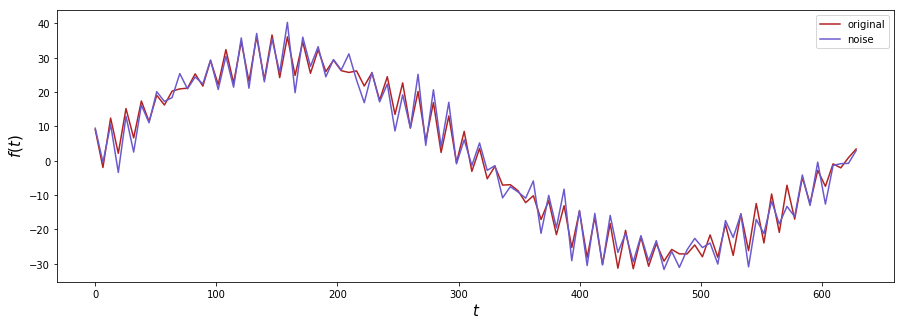

In [9]:
plt.figure(figsize = (15,5))
plt.plot( x1, y1 + e1, color = 'firebrick', label = 'original')

plt.plot( x1, y1, color = 'slateblue' ,label = 'noise')
#plt.plot( x1, y1,'b.' ,label = 'noise')

plt.legend(loc = 'best')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
plt.show()

In [10]:
at1 = acf(y1,lags = 100)

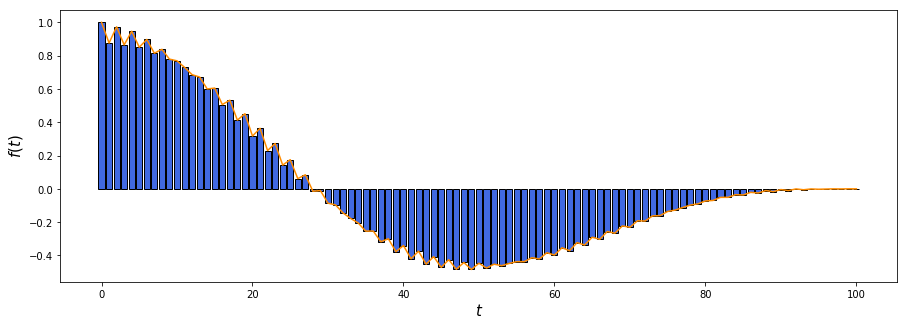

In [11]:
plt.figure(figsize = (15,5))
plt.bar(np.arange(len(at1)), at1,color ='royalblue',ec='black')
plt.plot(at1,color='darkorange')
plt.ylabel('autocorrelation')
plt.xlabel('lags')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
plt.show()

### Series 2

In [12]:
x2 = 2*np.pi* np.linspace( 0, 1000, 200)
e2 = np.random.normal( 0, 1.2, 200)
#r2 = 2*np.random.rand(7)

In [13]:
r2 = [0.18032283, 1.19359851, 0.78283639, 0.00709187, 0.46570131, 0.85325773, 0.10872303]

In [14]:
y2 = r2[0] + r2[1]*np.cos(r2[2]*x2) + r2[3]*np.sin(x2) + np.cos(x2) + r2[5]*np.sin(x2) + e2

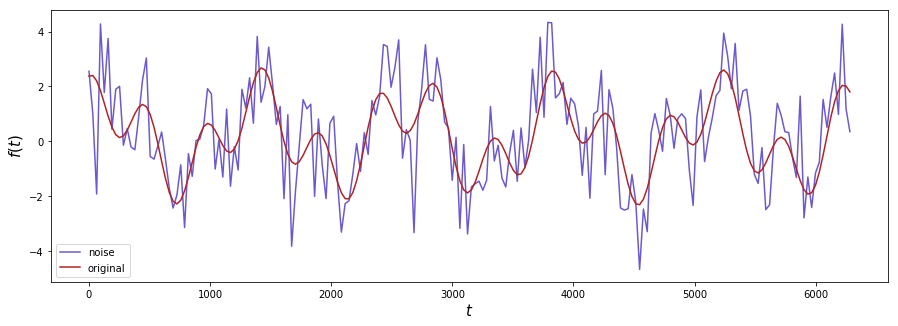

In [15]:
plt.figure(figsize = (15,5))
plt.plot( x2, y2, color = 'slateblue', label = 'noise')
plt.plot( x2, y2 - e2, color = 'firebrick', label = 'original')
plt.legend(loc = 'best')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
plt.show()

In [16]:
at2 = acf(y2,lags = 200)

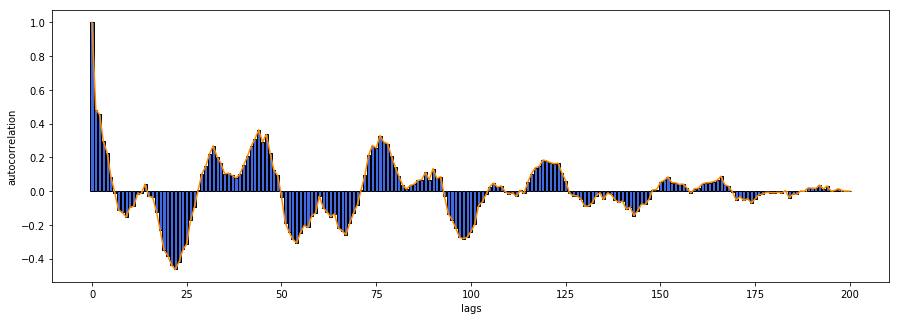

In [17]:
plt.figure(figsize = (15,5))
plt.bar(np.arange(len(at2)), at2,color ='royalblue',ec='black')
plt.plot(at2, color = 'darkorange')

plt.ylabel('autocorrelation')
plt.xlabel('lags')
plt.show()

### Series 3

In [18]:
#x3 = np.linspace( 0.001, 2*np.pi, 500)
x3 = (np.pi)*np.linspace( 0, 50, 50)

#e3 = np.random.normal( 0, 0.05, 100)
#r3 = -1.4*np.random.rand(9)

In [19]:
#r3

In [20]:
#y3 = r3[0] + r3[1]*np.cos(r3[2]*x3) + r3[3]*np.sin(x3) + r3[4]*np.cos(x3) + r3[5]*np.sin(x3) + r3[6]*np.cos(r3[7]*x3)+e3

In [21]:
#y3 = 100*np.sin(2*x3**2)/(2*x3**2)
y3 = 25*np.sin(4.05*x3)*np.exp(-0.03*x3) 

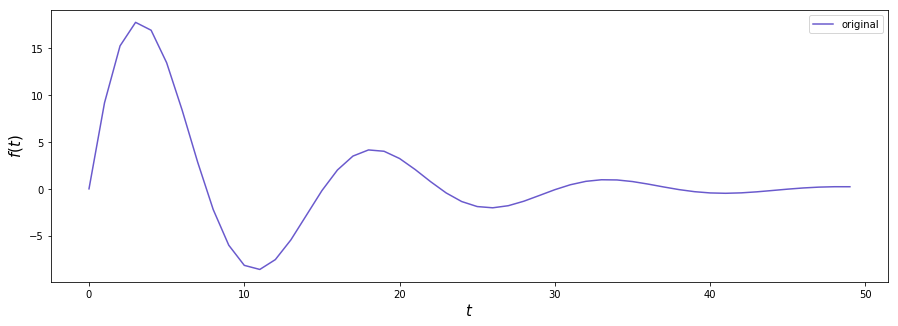

In [22]:
plt.figure(figsize = (15,5))
plt.plot( y3, color = 'slateblue', label = 'original')
plt.legend(loc = 'best')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
plt.show()

In [23]:
y3 = np.hstack((y3,y3,y3,y3,y3))

In [24]:
e3 = np.random.normal(0,1,len(y3))

In [25]:
y3 = y3 + e3

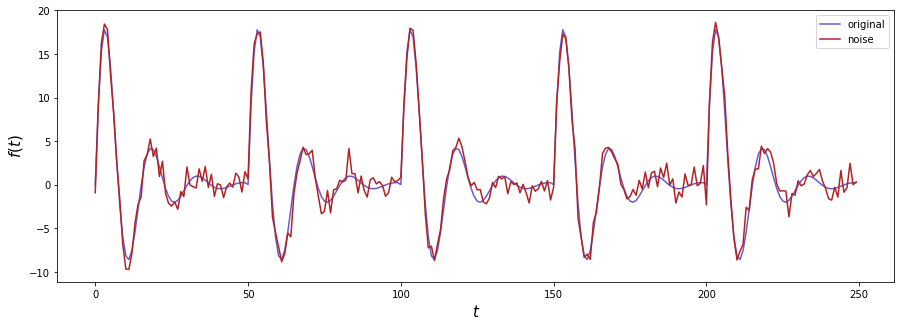

In [26]:
plt.figure(figsize = (15,5))
plt.plot( y3 - e3, color = 'slateblue', label = 'original')
plt.plot( y3, color = 'firebrick', label = 'noise')
plt.legend(loc = 'best')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
plt.show()

In [27]:
at3 = acf(y3,lags = 250)

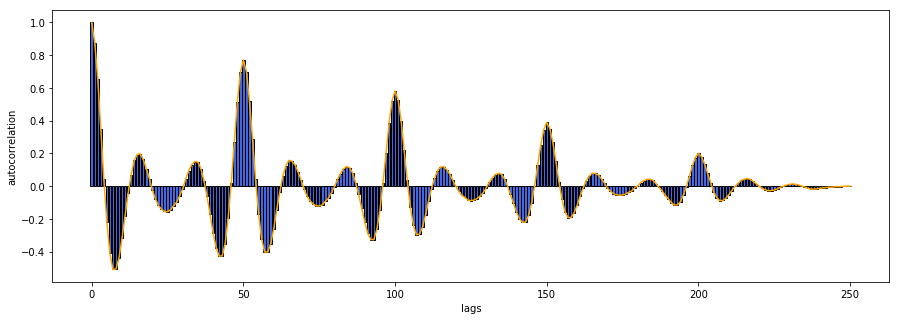

In [28]:
plt.figure(figsize = (15,5))
plt.bar(np.arange(len(at3)), at3,color ='royalblue',ec='black')
plt.plot(at3,color = 'orange')

plt.ylabel('autocorrelation')
plt.xlabel('lags')
plt.show()

$MAE = \frac{\sum\limits_{i=1}^{n} |y_i - \hat{y}_i|}{n}$

$MSE = \frac{1}{n}\sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2$

$MSLE = \frac{1}{n}\sum\limits_{i=1}^{n} (log(1+y_i) - log(1+\hat{y}_i))^2$

$MAPE = \frac{100}{n}\sum\limits_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i}$

In [29]:
def mae( y_true, y_pred):
    return np.mean( abs( y_true - y_pred) )

def mse( y_true, y_pred):
    return np.mean( ( y_true - y_pred)**2 )

def msle( y_true, y_pred):
    return np.mean( (np.log( 1 + y_true) - np.log( 1 + y_pred))**2)

def mape(y_true, y_pred): 
    return 100*np.mean(np.abs((y_true - y_pred) / y_true))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Moving average

$\hat{f}_{t} = \frac{1}{k}\sum_{n=1}^{k}f_{t-k}$

In [30]:
def moving_average( series, window):
    
    w = window       
    s = [ np.mean(series[k:k+w])  for k in range(len(series)-w + 1)]# if k + w < len(series)  ]
    
    return np.array(s)        

In [31]:
def annomalies( y_true, y_pred, eavg, estd):
    
    ann = []
    x_true = np.arange(len(y_true))
    
    for i in range(len(y_pred)):
        if y_true[i] > y_pred[i] + (eavg + estd) or y_true[i] < y_pred[i] - 1*(eavg + estd):
            ann.append( [ x_true[i], y_true[i] ] )
            
    return ann        
    

In [32]:
len(x1)

100

In [33]:
yma1 = moving_average(y1,window = 4)
yma2 = moving_average(y2,window = 5)
yma3 = moving_average(y3,window = 6)

In [34]:
mae1 = mae( y1[-len(yma1):], yma1)
d1 = np.std(y1[-len(yma1):]- yma1)

mae2 = mae( y2[-len(yma2):], yma2)
d2 = np.std(y2[-len(yma2):]- yma2)

mae3 = mae( y3[-len(yma3):], yma3)
d3 = np.std(y3[-len(yma3):]- yma3)


In [35]:
mae1

4.773685496770107

In [36]:
malies1 = annomalies( y1[-len(yma1):], yma1, mae1, d1)
malies2 = annomalies( y2[-len(yma2):], yma2, mae2, d2)
malies3 = annomalies( y3[-len(yma3):], yma3, mae3, d3)

In [37]:
malies1 = np.stack(malies1)
malies2 = np.stack(malies2)
malies3 = np.stack(malies3)

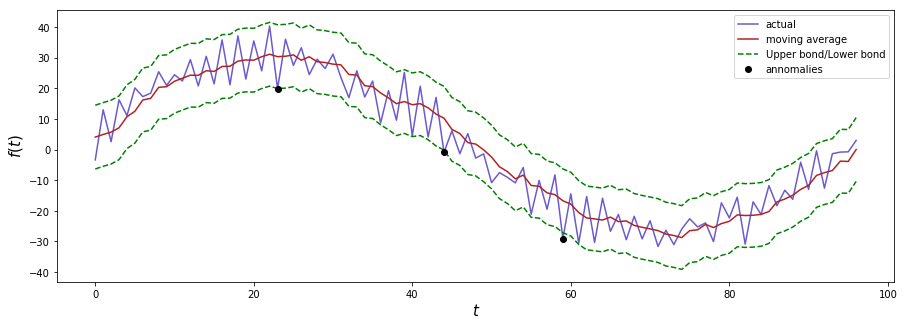

In [38]:
plt.figure(figsize = (15,5))
plt.plot(  y1 [-len(yma1):] , color = 'slateblue', label = 'actual')
plt.plot(  yma1, color = 'firebrick', label = 'moving average')
plt.plot(  yma1 + (mae1 + d1), 'g--', label = 'Upper bond/Lower bond')
plt.plot(  yma1 - (mae1 + d1), 'g--')
plt.plot( malies1[:,0], malies1[:,1], 'o',color = 'black', label = 'annomalies')
plt.legend(loc = 'best')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
plt.show()

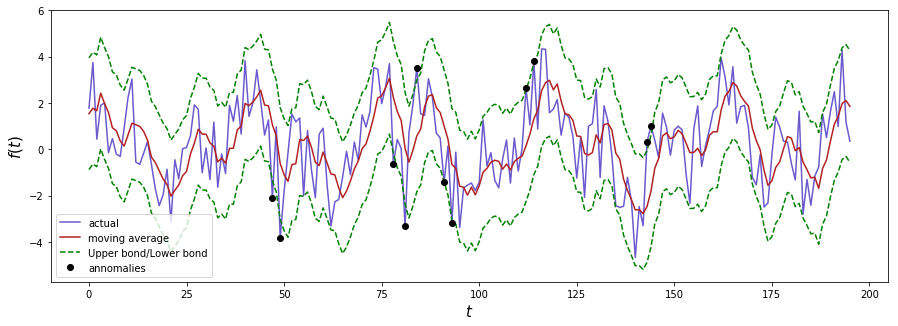

In [39]:
plt.figure(figsize = (15,5))
plt.plot(  y2[-len(yma2):] , color = 'slateblue', label = 'actual')
plt.plot(  yma2, color = 'firebrick', label = 'moving average')
plt.plot(  yma2 + (mae2 + d2), 'g--', label = 'Upper bond/Lower bond')
plt.plot(  yma2 - (mae2 + d2), 'g--')
plt.plot( malies2[:,0], malies2[:,1], 'o',color = 'black', label = 'annomalies')
plt.legend(loc = 'best')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
plt.show()

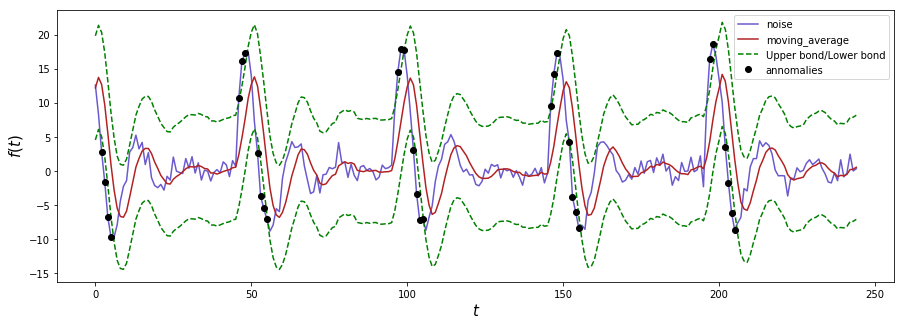

In [40]:
plt.figure(figsize = (15,5))
plt.plot( y3[-len(yma3):], color = 'slateblue', label = 'noise')
plt.plot(yma3, color = 'firebrick', label = 'moving_average')
plt.plot(yma3 + (mae3 + d3), 'g--', label = 'Upper bond/Lower bond')
plt.plot(yma3 - (mae3 + d3), 'g--')
plt.plot(malies3[:,0], malies3[:,1], 'o',color = 'black', label = 'annomalies')
plt.legend(loc = 'best')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
plt.show()

Weighted average is a simple modification to the moving average. The weights sum up to 1 with larger weights assigned to more recent observations

$\hat{f}_{t} = \sum_{n = 1}^{k}\omega_{n}f_{t+1-n}$

$\sum_{n}\omega_{n} = 1$

In [41]:
def weighted_average( series, weight):
    
    n = len(weight)
    weight = np.sort(weight)
    s = [ np.dot(series[k:k+n],weight) for k in range(len(series)- n + 1 ) ]
    
    return np.array(s)

In [42]:
weights = np.array( [0.1,0.3,0.6] )

In [43]:
ywa1 = weighted_average(y1,weights)
ywa2 = weighted_average(y2,weights)
ywa3 = weighted_average(y3,weights)

In [44]:
mae12 = mae( y1[-len(ywa1):], ywa1)
d12 = np.std(y1[-len(ywa1):]- ywa1)

mae22 = mae( y2[-len(ywa2):], ywa2)
d22 = np.std(y2[-len(ywa2):]- ywa2)

mae32 = mae( y3[-len(ywa3):], ywa3)
d32 = np.std(y3[-len(ywa3):]- ywa3)

In [45]:
malies12 = annomalies( y1[-len(ywa1):], ywa1, mae12, d12)

malies22 = annomalies( y2[-len(ywa2):], ywa2, mae22, d22)

malies32 = annomalies( y3[-len(ywa3):], ywa3, mae32, d32)

In [46]:
malies12 = np.stack(malies12)
malies22 = np.stack(malies22)
malies32 = np.stack(malies32)

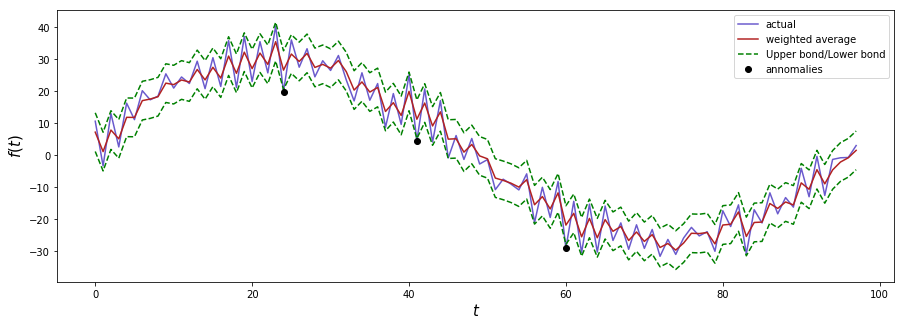

In [47]:
plt.figure(figsize = (15,5))
plt.plot(  y1[-len(ywa1):]  , color = 'slateblue', label = 'actual')
plt.plot(  ywa1, color = 'firebrick', label = 'weighted average')
plt.plot(  ywa1 + (mae12 + d12), 'g--', label = 'Upper bond/Lower bond')
plt.plot(  ywa1 - (mae12 + d12), 'g--')
plt.plot( malies12[:,0], malies12[:,1], 'o',color = 'black', label = 'annomalies')
plt.legend(loc = 'best')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
plt.show()

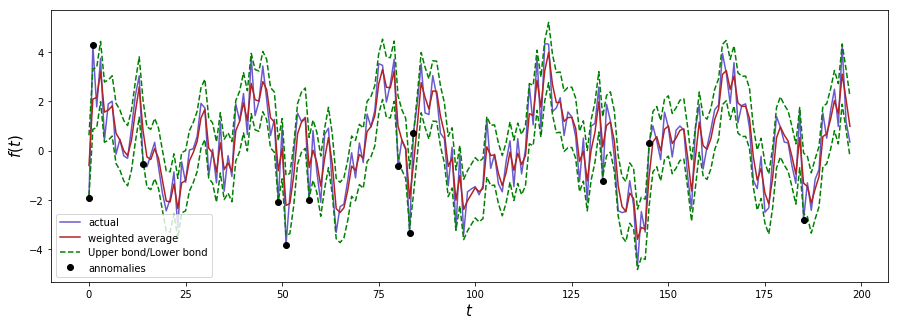

In [48]:
plt.figure(figsize = (15,5))
plt.plot(  y2[-len(ywa2):]  , color = 'slateblue', label = 'actual')
plt.plot(  ywa2, color = 'firebrick', label = 'weighted average')
plt.plot(  ywa2 + (mae22 + d22), 'g--', label = 'Upper bond/Lower bond')
plt.plot(  ywa2 - (mae22 + d22), 'g--')
plt.plot( malies22[:,0], malies22[:,1], 'o',color = 'black', label = 'annomalies')
plt.legend(loc = 'best')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
plt.show()

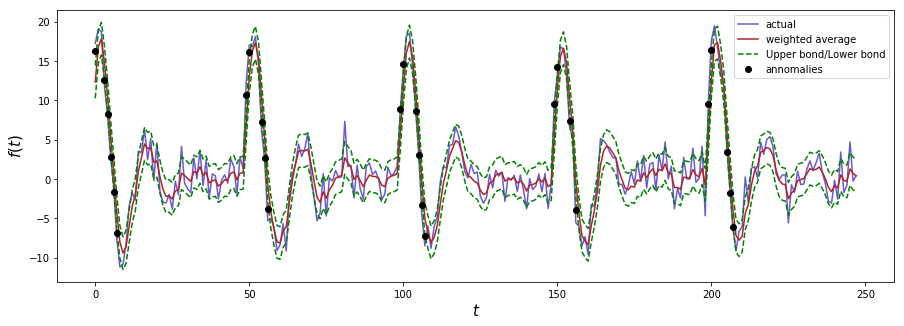

In [49]:
plt.figure(figsize = (15,5))
plt.plot(y3[-len(ywa3):] + e3[-len(ywa3):], color = 'slateblue', label = 'actual')
plt.plot(ywa3, color = 'firebrick', label = 'weighted average')
plt.plot(  ywa3 + (mae32 + d32), 'g--', label = 'Upper bond/Lower bond')
plt.plot(  ywa3 - (mae32 + d32), 'g--')
plt.plot( malies32[:,0], malies32[:,1], 'o',color = 'black', label = 'annomalies')
plt.legend(loc = 'best')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
plt.show()

### Exponential smoothing

$\hat{f}_{0} = f_{0} $

$\hat{f}_{t} = \alpha f_{t} + (1-\alpha)\hat{f}_{t-1}$

$0 < \alpha < 1$

### Double exponential smoothing

$\hat{f}_{t} = f_{0} $

$b_{0} = f_{1} - f_{0}$

$\hat{f}_{t} = \alpha f_{t} + (1-\alpha)(\hat{f}_{t-1} - b_{t-1})$

$b_{t} = \beta(\hat{f}_{t} - \hat{f}_{t-1}) + (1 - \beta)b_{t-1}$


$0 < \alpha < 1$, $0 < \beta < 1 $

Forecasting

$F_{m+t} = \hat{f}_{t} + mb_{t}$

### Holt winters (triple exponential smoothing)

$\hat{f}_{t} = f_{0} $

$b_{0} = \frac{1}{L^{2}} \left(f_{L+1}-f_{1} + f_{L+2} - f_{2} + ... +f_{L+L} - f_{L} \right) = \frac{1}{L^{2}}\sum_{i}^{L} f_{L + i} - f_{i} = \frac{1}{L}\langle f_{L + i} - f_{i} \rangle$

$A_{j} = \frac{1}{L} \sum_{i}^{L} f_{L(j-1) + i}$   for $j = ...,N$

$c_{i} = \frac{1}{N}\sum_{j}^{N}\frac{1}{A_{j}}f_{L(j-1)+i}$ for $i = ...,L$

$\hat{f}_{t} = \alpha (f_{t} -c_{t-L}) + (1-\alpha)(\hat{f}_{t-1} - b_{t-1})$

$b_{t} = \beta(\hat{f}_{t} - \hat{f}_{t-1}) + (1 - \beta)b_{t-1}$

$c_{t} = \gamma(f_{t} - \hat{f}_{t-1}- b_{t-1}) + (1-\gamma)c_{t-L}$

Forecasting

$F_{m+t} = \hat{f}_{t} + mb_{t} + c_{t-L+1+m-1(\text{mod}L)}$



In [50]:
def exponential_smoothing(series, a):
    
    s = np.zeros( len(series) )
    s[0] = series[0]
    for i in range(1, len(series)):
        s[i] = a*series[i] + (1-a)*s[i-1]
    return s    


def double_expotential_smoothing(series, a, b):
    T = len(series)
    s = np.zeros( T )
    B = np.zeros( T )
    s[0] = series[0]
    B[0] = series[1] - series[0]
    for t in range( 1, T ):
        s[t] = a*series[t] + (1-a)*(s[t-1] - B[t-1])
        B[t] = b*(s[t] - s[t-1]) + (1-b)*B[t-1]
    return s

def holtwinters(series, a, b, c, L):
    """
    L : length of a season
    a, b, c : alpha, beta, gamma
    """
    
    
    n_seasons = len(series)//L
    T = len(series)
    s = np.zeros(T)
    B = np.zeros(T)
    C = []
    #C = np.zeros(n_seasons)
    A = np.zeros(n_seasons)
    s[0] = series[0]
    B[0] = (1/L) * np.mean( series[L:L+L] - series[:L] )
    
    for j in range(n_seasons):
        A[j] = (1/L) * sum( series[ L*j: L*j + L] ) 
                 
    for i in range(L):
        suma = 0
        for j in range(n_seasons):
            suma += series[L*j + 1] - A[j]
        C.append( (1/L)*suma )
            
    C = np.array(C)        

    
    for t in range(1, T):
        s[t] = a*( series[t] - C[t%L] ) + (1-a)*( s[t-1] - B[t-1] )
        B[t] = b*( s[t] - series[t-1] ) + (1-b)*B[t-1]
        C[t%L] = c*( series[t] - s[t-1] - B[t-1]) + (1-c)*C[t%L]
        
    
    
    return s
    

In [51]:
yes1 = exponential_smoothing(y1,0.3)
#yes2 = exponential_smoothing(y1,0.5)

In [52]:
ydes1 = double_expotential_smoothing(y1, 0.5, 0.2)
#ydes2 = double_expotential_smoothing(y1, 0.6, 0.6)

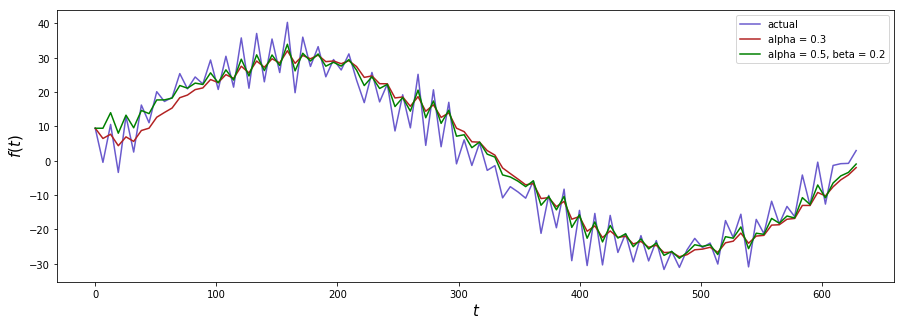

In [53]:
plt.figure(figsize = (15,5))
plt.plot( x1, y1   , color = 'slateblue', label = 'actual')
plt.plot( x1, yes1 , color = 'firebrick', label = 'alpha = 0.3')
#plt.plot( x1, yes2 , color = 'red', label = 'alpha = 0.5')
plt.plot( x1, ydes1, color = 'green', label = 'alpha = 0.5, beta = 0.2')
#plt.plot( x1, ydes2, color = 'orange', label = 'alpha = 0.6, beta = 0.6')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)

plt.legend(loc = 'best')


plt.show()

In [54]:
yte31 = holtwinters(y3, a = 0.5, b = 0.5, c = 0.5, L = 50)
yte32 = holtwinters(y3, a = 0.7, b = 0.7, c = 0.7, L = 50)
yte33 = holtwinters(y3, a = 0.85, b = 0.85, c = 0.85, L = 50)

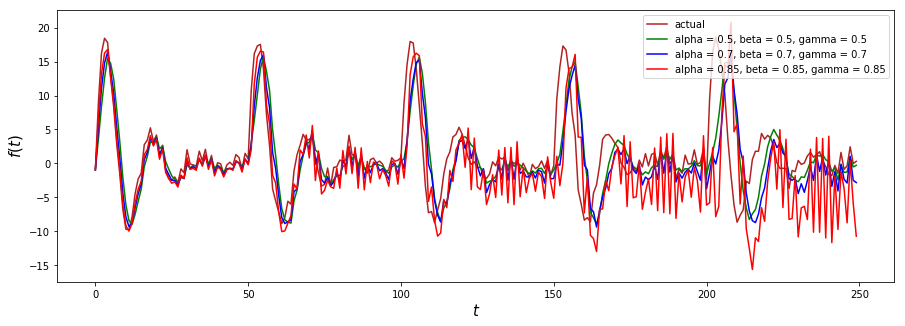

In [55]:
plt.figure(figsize = (15,5))
plt.plot(y3, color = 'firebrick', label = 'actual')
plt.plot(yte31, color = 'green', label = 'alpha = 0.5, beta = 0.5, gamma = 0.5')
plt.plot(yte32, color = 'blue', label = 'alpha = 0.7, beta = 0.7, gamma = 0.7')
plt.plot(yte33, color = 'red', label = 'alpha = 0.85, beta = 0.85, gamma = 0.85')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
plt.legend(loc = 'best')

plt.show()

### Stationary time series

Weak-sense stationarity

$\langle f_{t}\rangle = \langle f_{t+\tau}\rangle $

$\text{cov}(f_{t},f_{\tau}) = \text{cov}()$

$\langle \left(f-\langle f\rangle\right)^{2}\rangle < \infty$

In [56]:
r1 = np.random.normal(0,1,200)

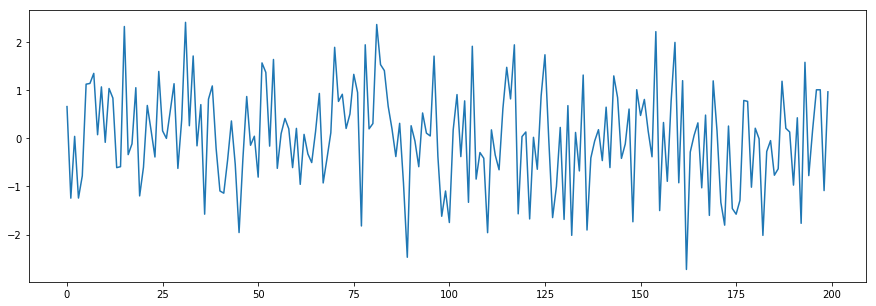

In [57]:
plt.figure(figsize = (15,5))
plt.plot(r1)
plt.show()

$f_{t} = \rho f_{t-1} + \epsilon$

$f_{t} - f_{t-1}= \rho f_{t-1} + \epsilon - f_{t-1} = (\rho - 1)f_{t-1} + \epsilon$

if $\rho = 1 \Rightarrow f_{t} - f_{t-1} = \epsilon $


In [58]:
def process(x, rho=0):
    x1 = np.zeros(len(x))
    w = np.random.normal(0,1,len(x))
    x1[0] = x1[0] + w[0]
    
    for t in range( 1,len(x)):
        x1[t] = rho * x1[t-1] + w[t]
    return x1    

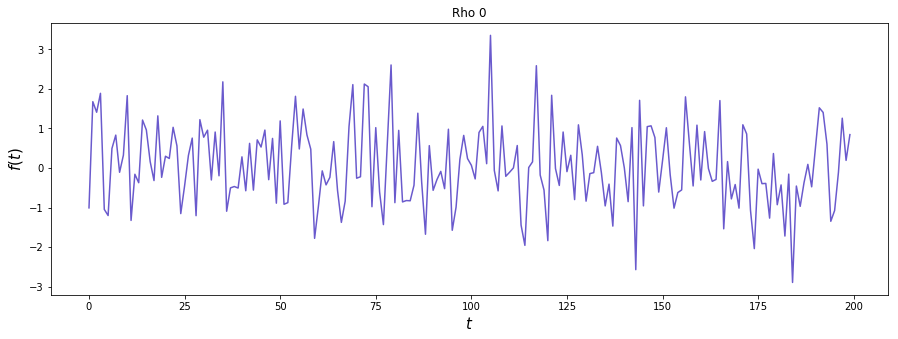

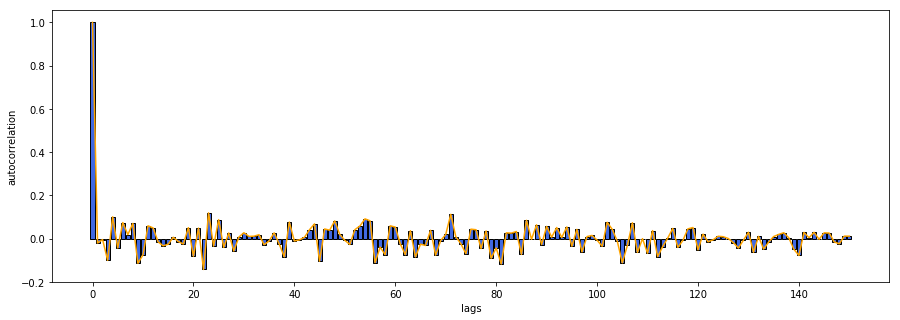

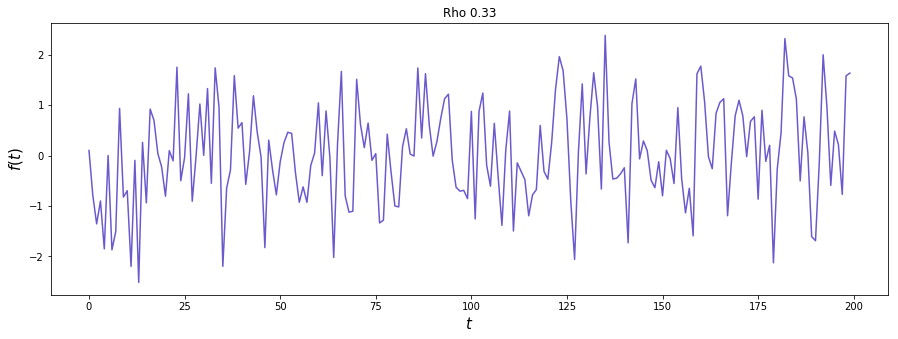

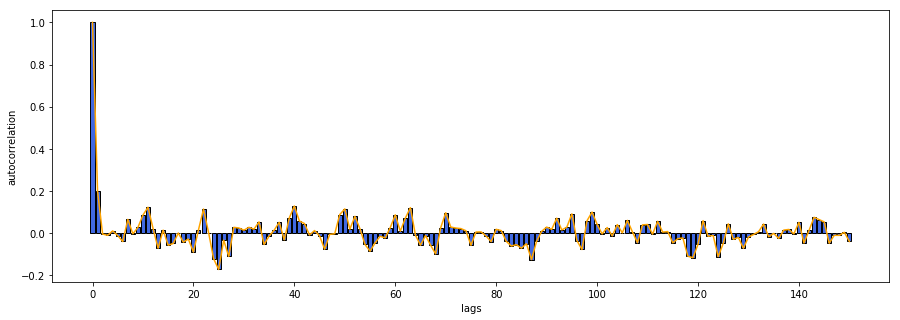

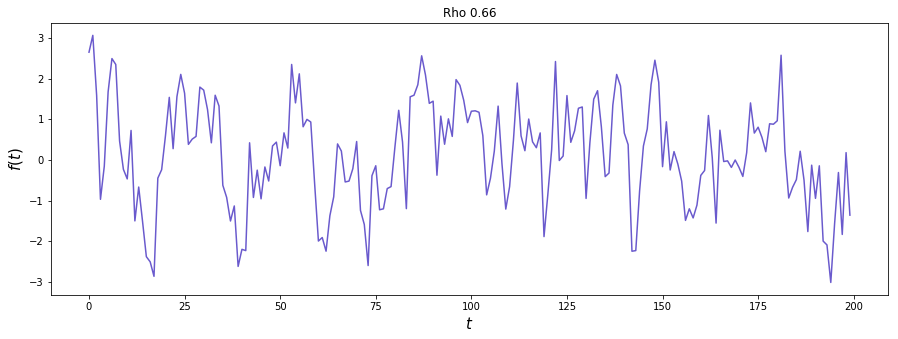

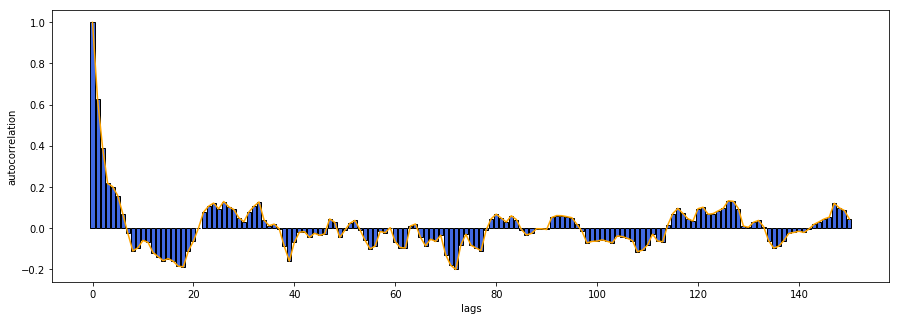

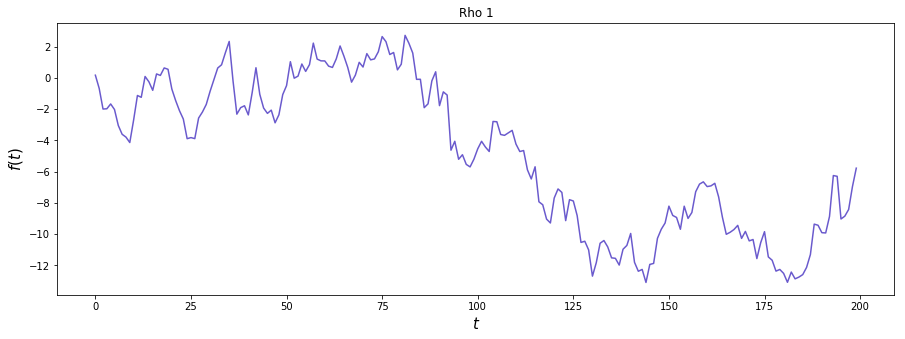

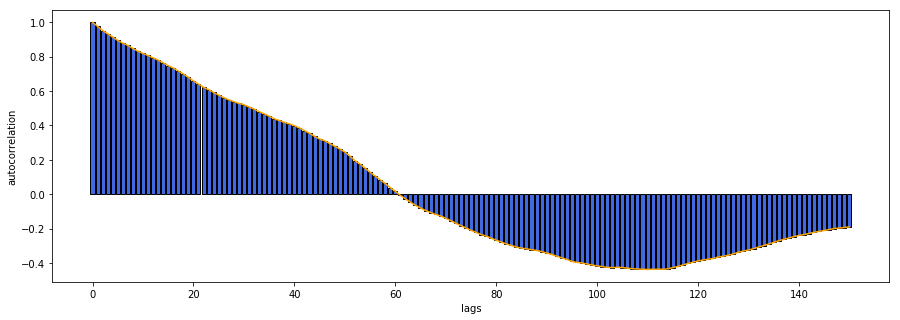

In [59]:
for rho in [0, 0.33, 0.66, 1]:
    pro1 = process( r1, rho = rho)
    auto1 = acf(pro1,lags = 150)
    plt.figure(figsize = (15,5))
    plt.plot(pro1, color = 'slateblue')
    plt.title("Rho {}".format(rho))
    plt.xlabel('$t$', fontsize = 15)
    plt.ylabel('$f(t)$', fontsize = 15)
    plt.show()
    
    plt.figure(figsize = (15,5))
    plt.bar(np.arange(len(auto1)), auto1,color ='royalblue',ec='black')
    plt.plot(auto1, color = 'orange')
    plt.ylabel('autocorrelation')
    plt.xlabel('lags')
    plt.show()

### Linear models on time series

$p(y|x,\theta) = \mathcal{N}(y|w^{T}x,\sigma^{2})$

$l(\theta) = \sum_{i}p(y_{i}|x_{i},\theta)$

$J(w) = \sum_{i}(y_{i}-w^{T}x_{i})^{2}$

$\frac{\partial J(w)}{\partial w} = 0$


In [60]:
tscv = TimeSeriesSplit(n_splits=4)

In [61]:
#yprueba = np.arange(40)

In [62]:
#yprueba

In [63]:
def shift(arr, num, fill_value=np.nan):
    result = np.empty(arr.shape)
    
    if num > 0:
        result[:num] = fill_value
        result[num:] = arr[:-num]
    
    elif num < 0:
        result[num:] = fill_value
        result[:num] = arr[-num:]
    
    else:
        result[:] = arr
    
    return result


def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X[:test_index,:]
    y_train = y[:test_index]
    
    X_test  = X[test_index:,:]
    y_test  = y[test_index:]
    
    return X_train, X_test, y_train, y_test

def no_nan_row(arr):
    
    i = 0
    
    while i < arr.shape[0]:
        if np.isnan(np.sum( arr[i]) ) == False:
            break
        i += 1    
    
    if i != 0:
        return i 
    
    else:
        return "no nans"

In [64]:
#shift(yprueba, num = 1)

In [65]:
#shift(y1, num=2)

In [66]:
ytest1lr = y1[:,None]
for i in range(1,10):
    s = shift(y1, num = i)
    ytest1lr = np.hstack( ( ytest1lr, s[:,None]) )

In [67]:
ytest1lr.shape

(100, 10)

In [68]:
n1 = no_nan_row(ytest1lr)
n1

9

In [69]:
#ytest[9:,1:]

In [70]:
X_train1lr, X_test1lr, y_train1lr, y_test1lr = timeseries_train_test_split(ytest1lr[n1:,1:], y1[n1:], test_size = 0.3)

In [71]:
#print(X_train, y_train)

In [72]:
C1lr = np.corrcoef(X_train1lr)

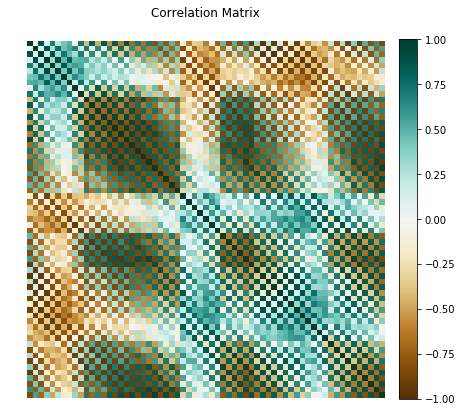

In [73]:
plt.figure(figsize=(7,7))
plt.matshow( C1lr, cmap = plt.cm.BrBG, vmin =-1, vmax =1, fignum = 1)
#plt.figure(figsize = (8,8))

plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
plt.title('Correlation Matrix')
plt.show()

In [74]:
lr1 = LinearRegression()
lr1.fit(X_train1lr, y_train1lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
prediction1lr = lr1.predict( X_test1lr)

In [76]:
prediction1lr

array([-26.13101958, -25.69928574, -29.07458171, -27.00051813,
       -30.35602923, -27.37508476, -31.78864217, -28.78301729,
       -24.47496691, -25.44984977, -19.15482344, -27.49784001,
       -17.78147654, -26.41049572, -14.77579147, -24.76396846,
       -14.17126379, -24.6892039 , -16.03327842, -16.00729018,
        -9.47564381, -10.75572345,  -7.52974565, -11.34335334,
         1.13801353,  -8.04330327,   1.9619474 ,  -2.55909574])

In [77]:
cv1lr = cross_val_score(lr1, X_train1lr, y_train1lr, cv=tscv, scoring = "neg_mean_absolute_error")

In [78]:
cv1lr

array([-4.93803071, -5.18531494, -4.14127835, -2.67674691])

In [79]:
mae1lr = cv1lr.mean() * (-1)
deviation1lr = cv1lr.std()
        
lower1lr = prediction1lr - (mae1lr + 1 * deviation1lr)
upper1lr = prediction1lr + (mae1lr + 1 * deviation1lr)
    

In [80]:
annomalies1lr = annomalies( y_test1lr, prediction1lr, mae1lr, deviation1lr)

In [81]:
#annomalies1lr = np.stack(annomalies1lr)

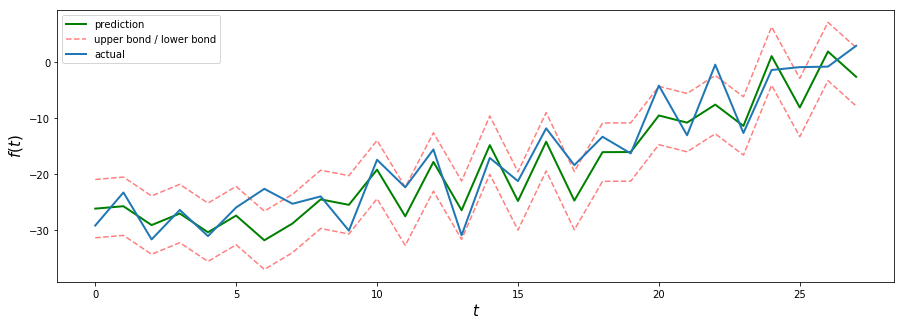

In [82]:
plt.figure(figsize=(15, 5))
plt.plot(prediction1lr, "g", label="prediction", linewidth=2.0)
plt.plot(lower1lr, "r--", label="upper bond / lower bond", alpha=0.5)
plt.plot(upper1lr, "r--", alpha=0.5)
plt.plot(y_test1lr, label="actual", linewidth=2.0)
#plt.plot( annomalies1lr[:,0], annomalies1lr[:,1], 'o',color = 'black', label = 'annomalies')
plt.legend(loc = 'best')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
error = mape( y_test1lr, prediction1lr)
plt.show()

In [83]:
lr1.coef_

array([ 0.0461649 ,  0.75670476,  0.0880587 ,  0.62743745,  0.08233019,
       -0.22515375, -0.25175429, -0.30840952,  0.16817045])

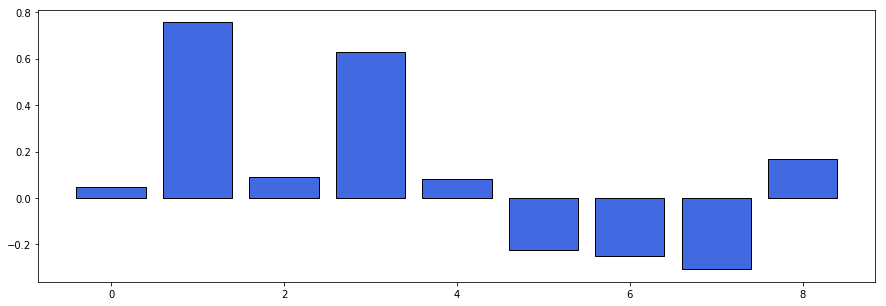

In [84]:
plt.figure(figsize = (15,5))
plt.bar(np.arange(len(lr1.coef_)), lr1.coef_,color ='royalblue',ec='black')
plt.show()

In [85]:
###

### Ridge regression

$p(w) = \prod_{j} \mathcal{N}(w_{j}|0,\tau^{2})$

$J(w) = \sum_{i}(y_{i}-w^{T}x)^{2}+\frac{\sigma^{2}}{\tau^{2}}||w^{T}w||^{2}$

In [86]:
from sklearn.linear_model import RidgeCV

In [87]:
ridge1 = RidgeCV(cv=tscv)
ridge1.fit(X_train1lr, y_train1lr)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
    cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [88]:
prediction1rr = ridge1.predict(X_test1lr)
cv1rr = cross_val_score(ridge1, X_train1lr, y_train1lr, cv=tscv, scoring = "neg_mean_absolute_error")


In [89]:
#cv1rr.mean()

In [90]:
mae1rr = cv1rr.mean() * (-1)
deviation1rr = cv1rr.std()
        
lower1rr = prediction1rr - (mae1rr + 1 * deviation1rr)
upper1rr = prediction1rr + (mae1rr + 1 * deviation1rr)

In [91]:
annomalies1rr = annomalies( y_test1lr, prediction1rr, mae1rr, deviation1rr)
#annomalies1rr = np.stack( annomalies1rr)

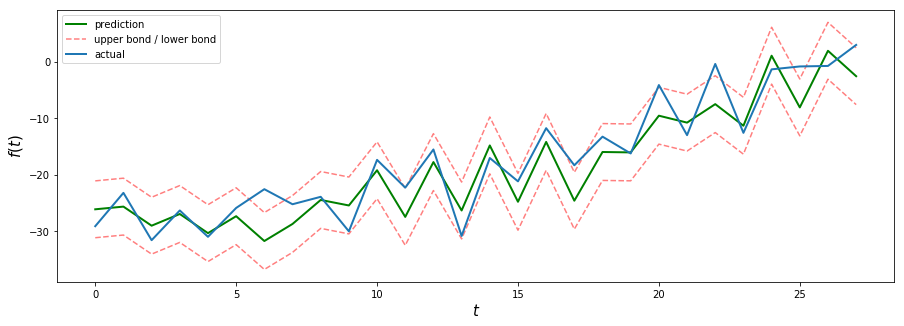

In [92]:
plt.figure(figsize=(15, 5))
plt.plot(prediction1rr, "g", label="prediction", linewidth=2.0)
plt.plot(lower1rr, "r--", label="upper bond / lower bond", alpha=0.5)
plt.plot(upper1rr, "r--", alpha=0.5)
plt.plot(y_test1lr, label="actual", linewidth=2.0)
#plt.plot( annomalies1rr[:,0], annomalies1rr[:,1], 'o',color = 'black', label = 'annomalies')
plt.legend(loc = 'best')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
error = mape(y_test1lr,prediction1rr)
plt.show()

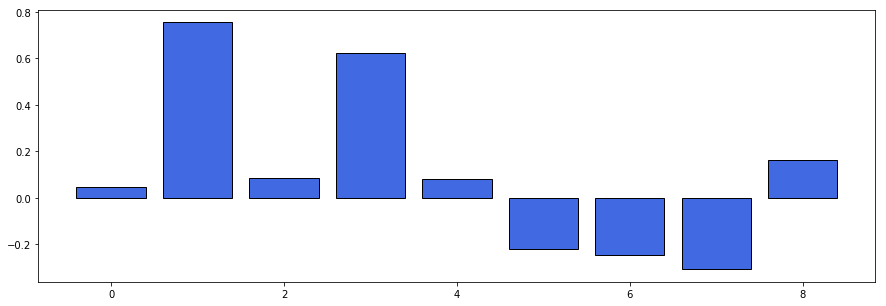

In [93]:
plt.figure(figsize = (15,5))
plt.bar(np.arange(len(ridge1.coef_)), ridge1.coef_,color ='royalblue',ec='black')
plt.show()

In [94]:
#from xgboost import XGBRegressor 

In [95]:
ytest2lr = y2[:,None]
for i in range(1,15):
    s = shift(y2, num = i)
    ytest2lr = np.hstack( ( ytest2lr, s[:,None]) )

In [96]:
n2 = no_nan_row(ytest2lr)
n2

14

In [97]:
ytest2lr.shape

(200, 15)

In [98]:
no_nan_row(ytest2lr)

14

In [99]:
X_train2lr, X_test2lr, y_train2lr, y_test2lr = timeseries_train_test_split(ytest2lr[n2:,1:], y2[n2:], test_size = 0.25)

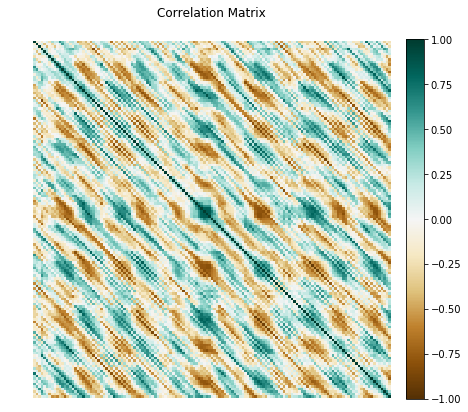

In [100]:
C2lr = np.corrcoef(X_train2lr)
plt.figure(figsize=(7,7))
plt.matshow( C2lr, cmap = plt.cm.BrBG, vmin =-1, vmax =1, fignum = 1)
#plt.figure(figsize = (8,8))

plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
plt.title('Correlation Matrix')
plt.show()

In [101]:
lr2 = LinearRegression()
lr2.fit(X_train2lr, y_train2lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
prediction2lr = lr2.predict( X_test2lr)

In [103]:
cv2lr = cross_val_score(lr2, X_train2lr, y_train2lr, cv=tscv, scoring = "neg_mean_absolute_error")

In [104]:
mae2lr = cv2lr.mean() * (-1)
deviation2lr = cv2lr.std()
        
lower2lr = prediction2lr - (mae2lr + 1 * deviation2lr)
upper2lr = prediction2lr + (mae2lr + 1 * deviation2lr)

annomalies2lr = annomalies( y_test2lr, prediction2lr, mae2lr, deviation2lr)
annomalies2lr = np.stack(annomalies2lr)


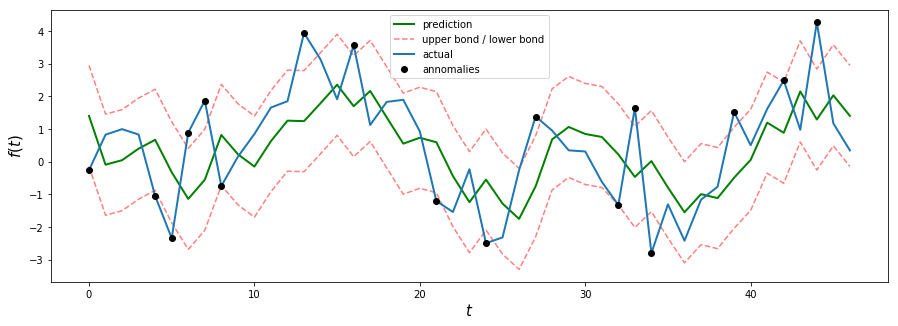

In [105]:
plt.figure(figsize=(15, 5))
plt.plot(prediction2lr, "g", label="prediction", linewidth=2.0)
plt.plot(lower2lr, "r--", label="upper bond / lower bond", alpha=0.5)
plt.plot(upper2lr, "r--", alpha=0.5)
plt.plot(y_test2lr, label="actual", linewidth=2.0)
plt.plot( annomalies2lr[:,0], annomalies2lr[:,1], 'o',color = 'black', label = 'annomalies')
plt.legend(loc = 'best')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
plt.show()

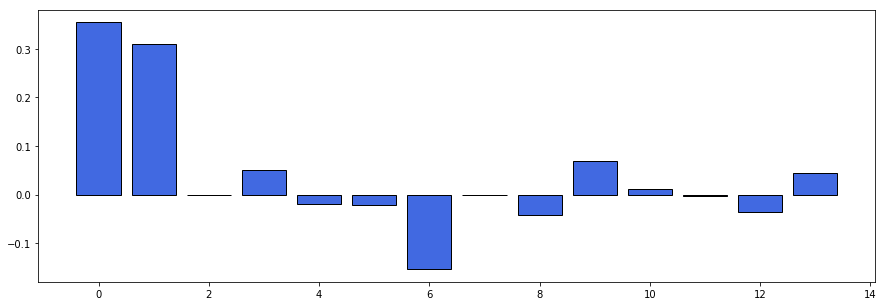

In [106]:
plt.figure(figsize = (15,5))
plt.bar(np.arange(len(lr2.coef_)), lr2.coef_,color ='royalblue',ec='black')
plt.show()

In [107]:
ytest3lr = y3[:,None]
for i in range(1,20):
    s = shift(y3, num = i)
    ytest3lr = np.hstack( ( ytest3lr, s[:,None]) )

In [108]:
n3 = no_nan_row(ytest3lr)
n3

19

In [109]:
X_train3lr, X_test3lr, y_train3lr, y_test3lr = timeseries_train_test_split(ytest3lr[n3:,1:], y3[n3:], test_size = 0.2)

In [110]:
ytest3lr.shape

(250, 20)

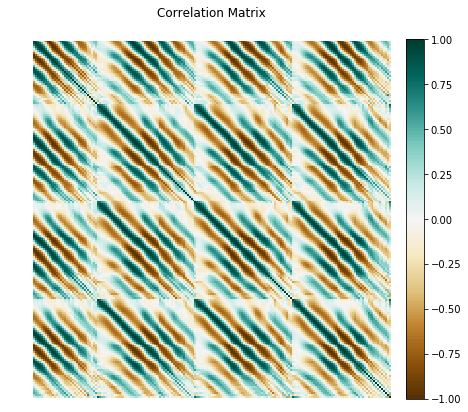

In [111]:
C3lr = np.corrcoef(X_train3lr)
plt.figure(figsize=(7,7))
plt.matshow( C3lr, cmap = plt.cm.BrBG, vmin =-1, vmax =1, fignum = 1)
#plt.figure(figsize = (8,8))

plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
plt.title('Correlation Matrix')
plt.show()

In [112]:
lr3 = LinearRegression()
lr3.fit(X_train3lr, y_train3lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
prediction3lr = lr3.predict( X_test3lr)

In [114]:
cv3lr = cross_val_score(lr3, X_train3lr, y_train3lr, cv=tscv, scoring = "neg_mean_absolute_error")

In [115]:
mae3lr = cv3lr.mean() * (-1)
deviation3lr = cv3lr.std()
        
lower3lr = prediction3lr - (mae3lr + 1 * deviation3lr)
upper3lr = prediction3lr + (mae3lr + 1 * deviation3lr)

annomalies3lr = annomalies( y_test3lr, prediction3lr, mae3lr, deviation3lr)
annomalies3lr = np.stack(annomalies3lr)


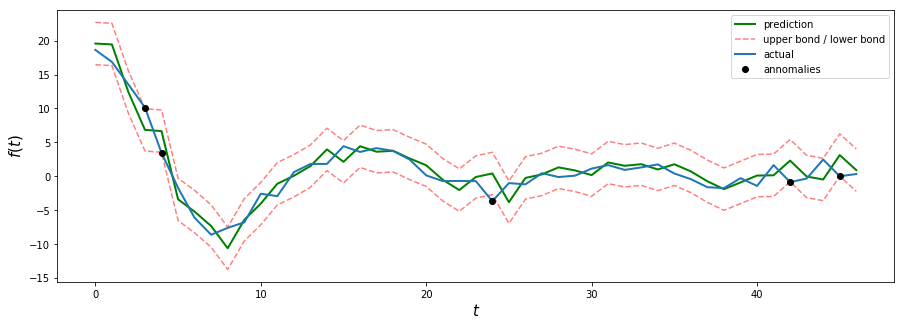

In [116]:
plt.figure(figsize=(15, 5))
plt.plot(prediction3lr, "g", label="prediction", linewidth=2.0)
plt.plot(lower3lr, "r--", label="upper bond / lower bond", alpha=0.5)
plt.plot(upper3lr, "r--", alpha=0.5)
plt.plot(y_test3lr, label="actual", linewidth=2.0)
plt.plot( annomalies3lr[:,0], annomalies3lr[:,1], 'o',color = 'black', label = 'annomalies')
plt.legend(loc = 'best')
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$f(t)$', fontsize = 15)
error = mape( y_test3lr, prediction3lr)
plt.show()

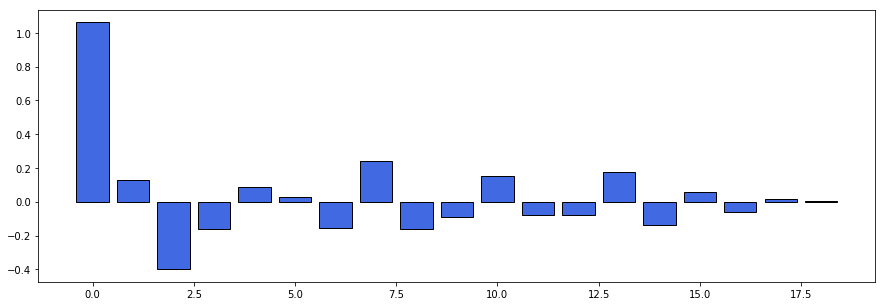

In [117]:
plt.figure(figsize = (15,5))
plt.bar(np.arange(len(lr3.coef_)), lr3.coef_,color ='royalblue',ec='black')
plt.show()